In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
import os
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pathlib
import time
import datetime
from IPython import display
import random



data_directory = 'D:\\Deletar\\pictures'
test_directory = 'C:\\Files\\manga\\argurmented'
tf.random.set_seed(42) 
SIZE = [1024,1024]


1

2

3

4

5

6

7

8

9

10

11

12

13

14

15

16

17

18

19

20

21

22

23

24

25

26

27

28

29

30

31

32

33

34

35

36

37

38

39

40

41

42

43

44

45

46

47

48

49

50

51

52

53

54

55

56

57

58

59

60

61

62

63

64

65

66

67

68

69

70

71

72

73

74

75

76

77

78

79

80

81

82

83

84

85

86

87

88

89

90

91

92

93

94

95

96

97

98

99

100

101

102

103

104

105

106

107

108

109

110

111

112

113

114

115

116

117

118

119

120

121

122

123

124

125

126

127

128

129

130

131

132

133

134

135

136

137

138

139

140

141

142

143

144

145

146

147

148

149

150

151

152

153

154

155

156

157

158

159

160

161

162

163

164

165

166

167

168

169

170

171

172

173

174

175

176

177

178

179

180

181

182

183

184

185

186

187

188

189

190

191

192

193

194

195

196

197

198

199

200

201

202

203

204

205

206

207

208

209

210

211

212

213

214

215

216

217

218

219

220

221

22

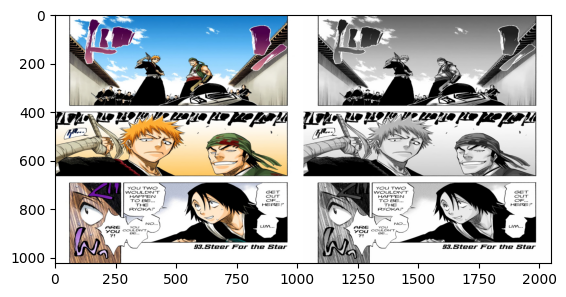

In [2]:
def resize_image(data):
    resized_img = tf.image.resize(
    images=data,
    size=SIZE,
    method=tf.image.ResizeMethod.BILINEAR,
    preserve_aspect_ratio=False,
    antialias=False,
    name=None
    )    
    return resized_img

cont = 0


def save_f(img,filename):
    rdn = random.uniform(0, 1)
    dir_save = ""
    if (0.66 > rdn):
        dir_save = f"{test_directory}\\train\\{filename}.jpg"
    elif (0.82 > rdn):
        dir_save = f"{test_directory}\\test\\{filename}.jpg"
    else:
         dir_save = f"{test_directory}\\val\\{filename}.jpg"
    tf.keras.preprocessing.image.save_img(dir_save, img)
    

def load_images_from_folder(folder):
    images = []
    cont2 = 0
    for filename in os.listdir(folder):
        global cont
        cont2 = cont2 + 1
        try:
            img1 = resize_image(plt.imread(os.path.join(folder,filename)))
            img2 =  tf.image.rgb_to_grayscale(img1)
            img2 = np.concatenate((img2,img2,img2),axis=-1)
            img_merged = tf.concat([img1, img2], 1)
            if img_merged is not None:
                save_f(img_merged,filename)
                images.append(img_merged)
                print()
        except:
            cont = cont + 1
        print(cont2)
    return images

X_test = load_images_from_folder(data_directory)

plt.imshow(np.array(X_test[0], dtype=int))
